# Team 6 Project: MINJUSTICIA

In [94]:
import pandas as pd
import numpy as np
import calendar
from matplotlib import pyplot as plt
%matplotlib inline
pd.options.display.max_rows = 15
import requests
import io
from datetime import datetime, date

Data

In [2]:
url="https://raw.githubusercontent.com/sagilar/ds4a-team6/master/retomintic/Data_UpdateJune13/reincidencia11junio2020_clean.csv"
df_mj = pd.read_csv(url,sep=",",encoding="utf-8")
df_mj

,INTERNOEN,DELITO,TITULO_DELITO,SUBTITULO_DELITO,TENTATIVA,AGRAVADO,CALIFICADO,FECHA_INGRESO,FECHA_SALIDA,FECHA_CAPTURA,...,ACTIVIDADES_ENSEÑANZA,NIVEL_EDUCATIVO,HIJOS_MENORES,CONDIC_EXPECIONAL,CODIGO_ESTABLECIMIENTO,ESTABLECIMIENTO,DEPTO_ESTABLECIMIENTO,MPIO_ESTABLECIMIENTO,REGIONAL,ESTADO
0,5496C737C624136DB406CFC6744C684C070A3CD8,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,01/01/10,12/05/11,30/12/09,...,NO,CICLO III,SI,NaN,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Baja
1,1097561F306939C26DB4AC60377063DA7E2B079F,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES,CONTRA LA SALUD PUBLICA,DE LAS AFECTACIONES A LA SALUD PUBLICA,N,N,N,01/01/10,05/12/11,30/12/09,...,NO,CICLO I,SI,NaN,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Baja
2,CB7033A707ADE673139F8A17CAD26AD54696C135,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,01/01/10,06/08/13,30/12/09,...,NO,CICLO I,SI,NaN,235,EPAMSCAS POPAYAN (ERE),CAUCA,POPAYAN,OCCIDENTE,Baja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142896,856368363834654A5F64534163FE7C7EE6A8A1CA,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,11/06/20,NaN,13/08/16,...,NO,CICLO I,NO,CON DISCAPACIDAD,613,EPMSC ARMENIA,QUINDIO,ARMENIA,VIEJO CALDAS,Activo
142897,E5385D722533896751FBF38A2129D97966267AB1,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,S,N,N,11/06/20,NaN,09/06/20,...,NO,CICLO I,SI,AFRO COLOMBIANO,5373,COMPLEJO CARCELARIO Y PENITENCIARIO DE MEDELLI...,ANTIOQUIA,MEDELLIN,NOROESTE,Activo
142898,FA176CD9955DAF77F313343E29136E87FE8B0056,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,11/06/20,NaN,02/08/18,...,NO,CICLO IV,SI,NaN,204,EPMSC EL BORDO,CAUCA,EL BORDO,OCCIDENTE,Activo


In [3]:
df_orig = df_mj.copy()
df_mj.columns

Index(['INTERNOEN', 'DELITO', 'TITULO_DELITO', 'SUBTITULO_DELITO', 'TENTATIVA',
       'AGRAVADO', 'CALIFICADO', 'FECHA_INGRESO', 'FECHA_SALIDA',
       'FECHA_CAPTURA', 'SITUACION_JURIDICA', 'ANO_NACIMIENTO', 'EDAD',
       'GENERO', 'ESTADO_CIVIL', 'PAIS_INTERNO', 'DEPARTAMENTO', 'CIUDAD',
       'REINCIDENTE', 'ESTADO_INGRESO', 'ACTIVIDADES_TRABAJO',
       'ACTIVIDADES_ESTUDIO', 'ACTIVIDADES_ENSEÑANZA', 'NIVEL_EDUCATIVO',
       'HIJOS_MENORES', 'CONDIC_EXPECIONAL', 'CODIGO_ESTABLECIMIENTO',
       'ESTABLECIMIENTO', 'DEPTO_ESTABLECIMIENTO', 'MPIO_ESTABLECIMIENTO',
       'REGIONAL', 'ESTADO'],
      dtype='object')

In [4]:
# df_mj =df_orig.copy()
df_mj["FECHA_CAPTURA"] = pd.to_datetime(df_mj["FECHA_CAPTURA"])
df_mj["FECHA_INGRESO"] = pd.to_datetime(df_mj["FECHA_INGRESO"])
df_mj["FECHA_SALIDA"] = pd.to_datetime(df_mj["FECHA_SALIDA"])

df_mj["MES_INGRESO_INT"]=df_mj["FECHA_INGRESO"].dt.strftime('%m')
df_mj

,INTERNOEN,DELITO,TITULO_DELITO,SUBTITULO_DELITO,TENTATIVA,AGRAVADO,CALIFICADO,FECHA_INGRESO,FECHA_SALIDA,FECHA_CAPTURA,...,NIVEL_EDUCATIVO,HIJOS_MENORES,CONDIC_EXPECIONAL,CODIGO_ESTABLECIMIENTO,ESTABLECIMIENTO,DEPTO_ESTABLECIMIENTO,MPIO_ESTABLECIMIENTO,REGIONAL,ESTADO,MES_INGRESO_INT
0,5496C737C624136DB406CFC6744C684C070A3CD8,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2010-01-01,2011-12-05,2009-12-30,...,CICLO III,SI,NaN,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Baja,01
1,1097561F306939C26DB4AC60377063DA7E2B079F,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES,CONTRA LA SALUD PUBLICA,DE LAS AFECTACIONES A LA SALUD PUBLICA,N,N,N,2010-01-01,2011-05-12,2009-12-30,...,CICLO I,SI,NaN,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Baja,01
2,CB7033A707ADE673139F8A17CAD26AD54696C135,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2010-01-01,2013-06-08,2009-12-30,...,CICLO I,SI,NaN,235,EPAMSCAS POPAYAN (ERE),CAUCA,POPAYAN,OCCIDENTE,Baja,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142896,856368363834654A5F64534163FE7C7EE6A8A1CA,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2020-11-06,NaT,2016-08-13,...,CICLO I,NO,CON DISCAPACIDAD,613,EPMSC ARMENIA,QUINDIO,ARMENIA,VIEJO CALDAS,Activo,11
142897,E5385D722533896751FBF38A2129D97966267AB1,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,S,N,N,2020-11-06,NaT,2020-09-06,...,CICLO I,SI,AFRO COLOMBIANO,5373,COMPLEJO CARCELARIO Y PENITENCIARIO DE MEDELLI...,ANTIOQUIA,MEDELLIN,NOROESTE,Activo,11
142898,FA176CD9955DAF77F313343E29136E87FE8B0056,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2020-11-06,NaT,2018-02-08,...,CICLO IV,SI,NaN,204,EPMSC EL BORDO,CAUCA,EL BORDO,OCCIDENTE,Activo,11


In [5]:
# df_mj.INTERNOEN != df_mj.INTERNOEN.shift(1)
# df_mj.loc[(df_mj.INTERNOEN != df_mj.INTERNOEN.shift(1)), 
#               ['DIAS' + column[5:]]] = pd.to_datetime("today") - df_mj[column]
df_mj.tail()
# for column in ['FECHA_INGRESO', 'FECHA_SALIDA', 'FECHA_CAPTURA']:
#     df = df_mj.loc[(df_mj.INTERNOEN != df_mj.INTERNOEN.shift(1)) | (df_mj['DIAS' + column[5:]] == np.timedelta64(0)), 
#               ['DIAS' + column[5:]]].copy()
#     print(pd.to_datetime("today") - df_mj[column])
# df

# datetime.today() - pd.to_datetime(df_mj["DIAS_CAPTURA"])
# datetime.today()

,INTERNOEN,DELITO,TITULO_DELITO,SUBTITULO_DELITO,TENTATIVA,AGRAVADO,CALIFICADO,FECHA_INGRESO,FECHA_SALIDA,FECHA_CAPTURA,...,NIVEL_EDUCATIVO,HIJOS_MENORES,CONDIC_EXPECIONAL,CODIGO_ESTABLECIMIENTO,ESTABLECIMIENTO,DEPTO_ESTABLECIMIENTO,MPIO_ESTABLECIMIENTO,REGIONAL,ESTADO,MES_INGRESO_INT
142894,E5551238168C284F73834D203E0EAD0679E5168C,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,N,S,S,2020-10-06,NaT,2019-01-09,...,CICLO III,SI,NaN,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Activo,10
142895,A513E93CA6CBAED54CD9B1D165C75A3EF4F11CD4,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,N,S,S,2020-11-06,NaT,2014-10-12,...,CICLO II,NO,NaN,628,EPMSC HONDA,TOLIMA,HONDA,VIEJO CALDAS,Activo,11
142896,856368363834654A5F64534163FE7C7EE6A8A1CA,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2020-11-06,NaT,2016-08-13,...,CICLO I,NO,CON DISCAPACIDAD,613,EPMSC ARMENIA,QUINDIO,ARMENIA,VIEJO CALDAS,Activo,11
142897,E5385D722533896751FBF38A2129D97966267AB1,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,S,N,N,2020-11-06,NaT,2020-09-06,...,CICLO I,SI,AFRO COLOMBIANO,5373,COMPLEJO CARCELARIO Y PENITENCIARIO DE MEDELLI...,ANTIOQUIA,MEDELLIN,NOROESTE,Activo,11
142898,FA176CD9955DAF77F313343E29136E87FE8B0056,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2020-11-06,NaT,2018-02-08,...,CICLO IV,SI,NaN,204,EPMSC EL BORDO,CAUCA,EL BORDO,OCCIDENTE,Activo,11


In [81]:
for column in ['FECHA_INGRESO', 'FECHA_SALIDA', 'FECHA_CAPTURA']:
    df_mj = df_mj.sort_values(['INTERNOEN', column], ascending = False)
    
    df_mj['DIAS' + column[5:]] = -1*df_mj[column].diff().copy()

    df_mj['DIAS' + column[5:]][(df_mj.INTERNOEN != df_mj.INTERNOEN.shift(1)) | (df_mj['DIAS' + column[5:]] == np.timedelta64(0))] = (datetime.today() - pd.to_datetime(df_mj[column]))

#     df_mj.loc[(df_mj.INTERNOEN != df_mj.INTERNOEN.shift(1)) | (df_mj['DIAS' + column[5:]] == np.timedelta64(0)), 
#               ['DIAS' + column[5:]]] = (pd.to_datetime(datetime.today() - df_mj[column])).values.astype('datetime64[D]')


df_mj

<ipython-input-81-50a6f3ddb6c1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mj['DIAS' + column[5:]][(df_mj.INTERNOEN != df_mj.INTERNOEN.shift(1)) | (df_mj['DIAS' + column[5:]] == np.timedelta64(0))] = (datetime.today() - pd.to_datetime(df_mj[column]))


,INTERNOEN,DELITO,TITULO_DELITO,SUBTITULO_DELITO,TENTATIVA,AGRAVADO,CALIFICADO,FECHA_INGRESO,FECHA_SALIDA,FECHA_CAPTURA,...,MPIO_ESTABLECIMIENTO,REGIONAL,ESTADO,MES_INGRESO_INT,DIAS_INGRESO,DIAS_SALIDA,DIAS_CAPTURA,DIAS_CONDENA,DIAS_JUDICIALIZACION,DIAS_LIBRE
72750,FFFFB0916FD16C7AF652FF211662005C40F70E33,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2016-05-02,NaT,2016-02-02,...,MEDELLIN,NOROESTE,Activo,05,1510 days 11:57:38.285126,NaT,1600 days 11:57:38.988605,NaT,90 days,NaN
72751,FFFFB0916FD16C7AF652FF211662005C40F70E33,HOMICIDIO,CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL,DE LA MANIPULACION GENETICA,N,S,N,2016-05-02,NaT,2016-02-02,...,MEDELLIN,NOROESTE,Activo,05,1510 days 11:57:38.285126,NaT,1600 days 11:57:38.988605,NaT,90 days,NaN
72752,FFFFB0916FD16C7AF652FF211662005C40F70E33,HOMICIDIO,CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL,DE LA MANIPULACION GENETICA,S,N,N,2016-05-02,NaT,2016-02-02,...,MEDELLIN,NOROESTE,Activo,05,1510 days 11:57:38.285126,NaT,1600 days 11:57:38.988605,NaT,90 days,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133508,000357E4F19E3722BA43488F69A7D7DECFC620C4,CONCIERTO PARA DELINQUIR,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2019-09-25,NaT,2017-12-14,...,PEREIRA,VIEJO CALDAS,Activo,09,269 days 11:57:38.285126,NaT,919 days 11:57:38.988605,NaT,650 days,NaN
133509,000357E4F19E3722BA43488F69A7D7DECFC620C4,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,N,S,S,2019-09-25,NaT,2017-12-14,...,PEREIRA,VIEJO CALDAS,Activo,09,269 days 11:57:38.285126,NaT,919 days 11:57:38.988605,NaT,650 days,NaN
112953,000334541B6B3305CE91761942D7B381248777EA,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES,CONTRA LA SALUD PUBLICA,DE LAS AFECTACIONES A LA SALUD PUBLICA,N,N,N,2018-06-08,NaT,2018-02-08,...,PITALITO,CENTRAL,Activo,06,743 days 11:57:38.285126,NaT,863 days 11:57:38.988605,NaT,120 days,NaN


In [82]:
df_mj['DIAS_CONDENA'] = df_mj['FECHA_SALIDA'] - df_mj['FECHA_INGRESO'] 
df_mj['DIAS_JUDICIALIZACION'] = df_mj['FECHA_INGRESO'] - df_mj['FECHA_CAPTURA']
df_mj['DIAS_LIBRE'] = (df_mj['DIAS_INGRESO'] - df_mj['DIAS_CONDENA'])
df_mj.tail()
# df_mj['DIAS_CAPTURA'].unique().astype('timedelta64[D]')

,INTERNOEN,DELITO,TITULO_DELITO,SUBTITULO_DELITO,TENTATIVA,AGRAVADO,CALIFICADO,FECHA_INGRESO,FECHA_SALIDA,FECHA_CAPTURA,...,MPIO_ESTABLECIMIENTO,REGIONAL,ESTADO,MES_INGRESO_INT,DIAS_INGRESO,DIAS_SALIDA,DIAS_CAPTURA,DIAS_CONDENA,DIAS_JUDICIALIZACION,DIAS_LIBRE
39682,000393AD7FE65FBBE53A61B0EAA1FB9A62F71450,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2013-05-17,2015-11-08,2010-04-22,...,BOGOTA D.C.,CENTRAL,Baja,05,2591 days 11:57:38.285126,1686 days 11:57:38.678582,3712 days 11:57:38.988605,905 days,1121 days,1686 days 11:57:38.285126
39683,000393AD7FE65FBBE53A61B0EAA1FB9A62F71450,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,N,S,S,2013-05-17,2015-11-08,2010-04-22,...,BOGOTA D.C.,CENTRAL,Baja,05,2591 days 11:57:38.285126,1686 days 11:57:38.678582,3712 days 11:57:38.988605,905 days,1121 days,1686 days 11:57:38.285126
133508,000357E4F19E3722BA43488F69A7D7DECFC620C4,CONCIERTO PARA DELINQUIR,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2019-09-25,NaT,2017-12-14,...,PEREIRA,VIEJO CALDAS,Activo,09,269 days 11:57:38.285126,NaT,919 days 11:57:38.988605,NaT,650 days,NaT
133509,000357E4F19E3722BA43488F69A7D7DECFC620C4,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,N,S,S,2019-09-25,NaT,2017-12-14,...,PEREIRA,VIEJO CALDAS,Activo,09,269 days 11:57:38.285126,NaT,919 days 11:57:38.988605,NaT,650 days,NaT
112953,000334541B6B3305CE91761942D7B381248777EA,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES,CONTRA LA SALUD PUBLICA,DE LAS AFECTACIONES A LA SALUD PUBLICA,N,N,N,2018-06-08,NaT,2018-02-08,...,PITALITO,CENTRAL,Activo,06,743 days 11:57:38.285126,NaT,863 days 11:57:38.988605,NaT,120 days,NaT


individuals

In [83]:
individuals = df_mj["INTERNOEN"].unique()
print("length of complete df: " + str(df_mj["INTERNOEN"].count()))
print("length of unique individuals: "+ str(len(individuals)))


length of complete df: 142899
length of unique individuals: 78841


In [84]:
print("number of occurrences by individual")
occurrences = df_mj["INTERNOEN"].value_counts()
occurrences

number of occurrences by individual


71D8863489582B956956B3E244CF97F629E190F8    16
85F84CC906246E467ACC8D3CD73B576E0B264556    15
5F6A19F239D3786924DB4FEAC108F33219BFD205    14
                                            ..
A79D45943B47E12B2C74EFB0CD62046123AFF98D     1
4D48DE748AA62EB869B5594D73CEC17C4674301A     1
37D9D3FA74C607CF411F8784AA24371BD6EDB78E     1
Name: INTERNOEN, Length: 78841, dtype: int64

In [85]:
for item in occurrences.index:
    print("crimes of individual " + str(item) + ": ")
    crime_list_per_ind = df_mj["DELITO"].where(df_mj["INTERNOEN"]==item)
    for crime in crime_list_per_ind.dropna():
        print(crime + ", ", end="")
    #breaking to check just first ind
    break

crimes of individual 71D8863489582B956956B3E244CF97F629E190F8: 
CONCIERTO PARA DELINQUIR, CONSTREÑIMIENTO ILEGAL, DESPLAZAMIENTO FORZADO, DESTRUCCION Y APROPIACION DE BIENES PROTEGIDOS, FABRICACION  TRAFICO Y PORTE DE ARMAS Y MUNICIONES DE USO PRIVATIVO DE LAS FUERZAS ARMADAS, HOMICIDIO, HOMICIDIO EN PERSONA PROTEGIDA, HURTO, RECLUTAMIENTO ILICITO, SECUESTRO SIMPLE, TORTURA EN PERSONA PROTEGIDA, UTILIZACION ILEGAL DE UNIFORMES E INSIGNIAS, CONCIERTO PARA DELINQUIR, DESPLAZAMIENTO FORZADO, HOMICIDIO, HURTO, 

Ubicación geográfica

In [86]:
dept_count = df_mj["DEPTO_ESTABLECIMIENTO"].value_counts()
dept_count

BOGOTA D.C.                 19008
ANTIOQUIA                   18591
VALLE DEL CAUCA             17346
                            ...  
PUTUMAYO                      378
AMAZONAS                      349
SAN ANDRES Y PROVIDENCIA      252
Name: DEPTO_ESTABLECIMIENTO, Length: 29, dtype: int64

In [88]:
gender_count = df_mj["GENERO"].value_counts()
gender_count

MASCULINO    131485
FEMENINO      11414
Name: GENERO, dtype: int64

In [96]:
education_count =df_mj["NIVEL_EDUCATIVO"].value_counts()
print(education_count)

df_mj["NIVEL_EDUCATIVO"].describe()

CICLO II               54353
CICLO I                28198
CICLO III              27839
CICLO IV               25109
ANALFABETA              3717
PROFESIONAL             1636
TECNICO                 1328
TECNOLOGICO              460
ESPECIALIZACION          145
TECNICO PROFESIONAL       61
POST GRADO                33
MAGISTER                  20
Name: NIVEL_EDUCATIVO, dtype: int64


count       142899
unique          12
top       CICLO II
freq         54353
Name: NIVEL_EDUCATIVO, dtype: object

In [102]:
education_male = df_mj["NIVEL_EDUCATIVO"][df_mj["GENERO"]=="MASCULINO"].value_counts()
education_female = df_mj["NIVEL_EDUCATIVO"][df_mj["GENERO"]=="FEMENINO"].value_counts()
print("Male education leves\n",education_male,"\n\n","Female education leves\n", education_female)

Male education leves
 CICLO II               49994
CICLO III              25844
CICLO I                25790
CICLO IV               23352
ANALFABETA              3389
PROFESIONAL             1375
TECNICO                 1128
TECNOLOGICO              397
ESPECIALIZACION          115
TECNICO PROFESIONAL       51
POST GRADO                30
MAGISTER                  20
Name: NIVEL_EDUCATIVO, dtype: int64 

 Female education leves
 CICLO II               4359
CICLO I                2408
CICLO III              1995
CICLO IV               1757
ANALFABETA              328
PROFESIONAL             261
TECNICO                 200
TECNOLOGICO              63
ESPECIALIZACION          30
TECNICO PROFESIONAL      10
POST GRADO                3
Name: NIVEL_EDUCATIVO, dtype: int64


In [105]:
df_mj["TITULO_DELITO"].value_counts()

CONTRA EL PATRIMONIO ECONOMICO                 56860
CONTRA LA SEGURIDAD PUBLICA                    31591
CONTRA LA SALUD PUBLICA                        25028
CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL        11329
CONTRA LA FAMILIA                               3689
                                               ...  
DELITOS DE PARAMILITARISMO Y SICARIATO             9
DELITOS CONTRA LA DISCIPLINA                       5
ACCION DE TUTELA                                   4
DELITOS CONTRA LA ADMINISTRACION PUBLICA           2
CONTRA LA EXISTENCIA Y SEGURIDAD DEL ESTADO        1
Name: TITULO_DELITO, Length: 25, dtype: int64

In [185]:
df_genero = pd.DataFrame(df_mj.groupby(["GENERO","TITULO_DELITO"])["INTERNOEN"].agg('count'))
df_genero.reset_index(inplace=True)
df_genero


df_geo_gen = pd.DataFrame(df_mj.groupby(["GENERO","DEPTO_ESTABLECIMIENTO"])["INTERNOEN"].agg('count'))
df_geo_gen.reset_index(inplace=True)

df_crimen = pd.DataFrame(df_mj.groupby(["TITULO_DELITO"])["INTERNOEN"].agg('count'))
df_crimen.reset_index(inplace=True)

df_edu_gen = pd.DataFrame(df_mj.groupby(["GENERO","NIVEL_EDUCATIVO"])["INTERNOEN"].agg('count'))
df_edu_gen.reset_index(inplace=True)

Text(0.5, 1.0, 'Crimes most commited per education level')

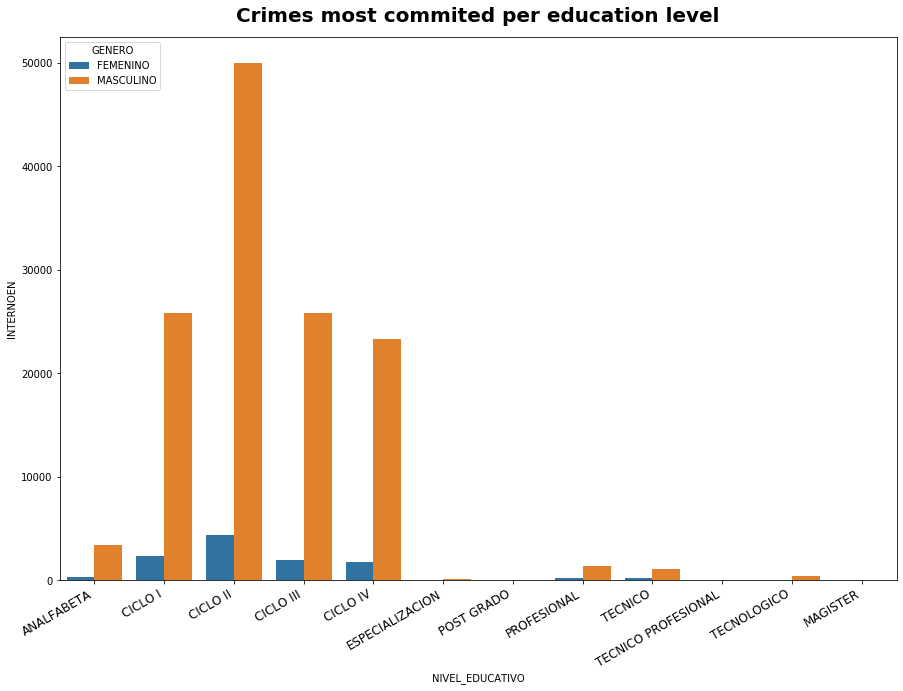

In [187]:
import seaborn as sns

fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x="NIVEL_EDUCATIVO", y="INTERNOEN", data=df_edu_gen, hue="GENERO", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right', fontsize = 12)

ax.set_title('Crimes most commited per education level', fontsize=20, fontweight='bold', pad=15)


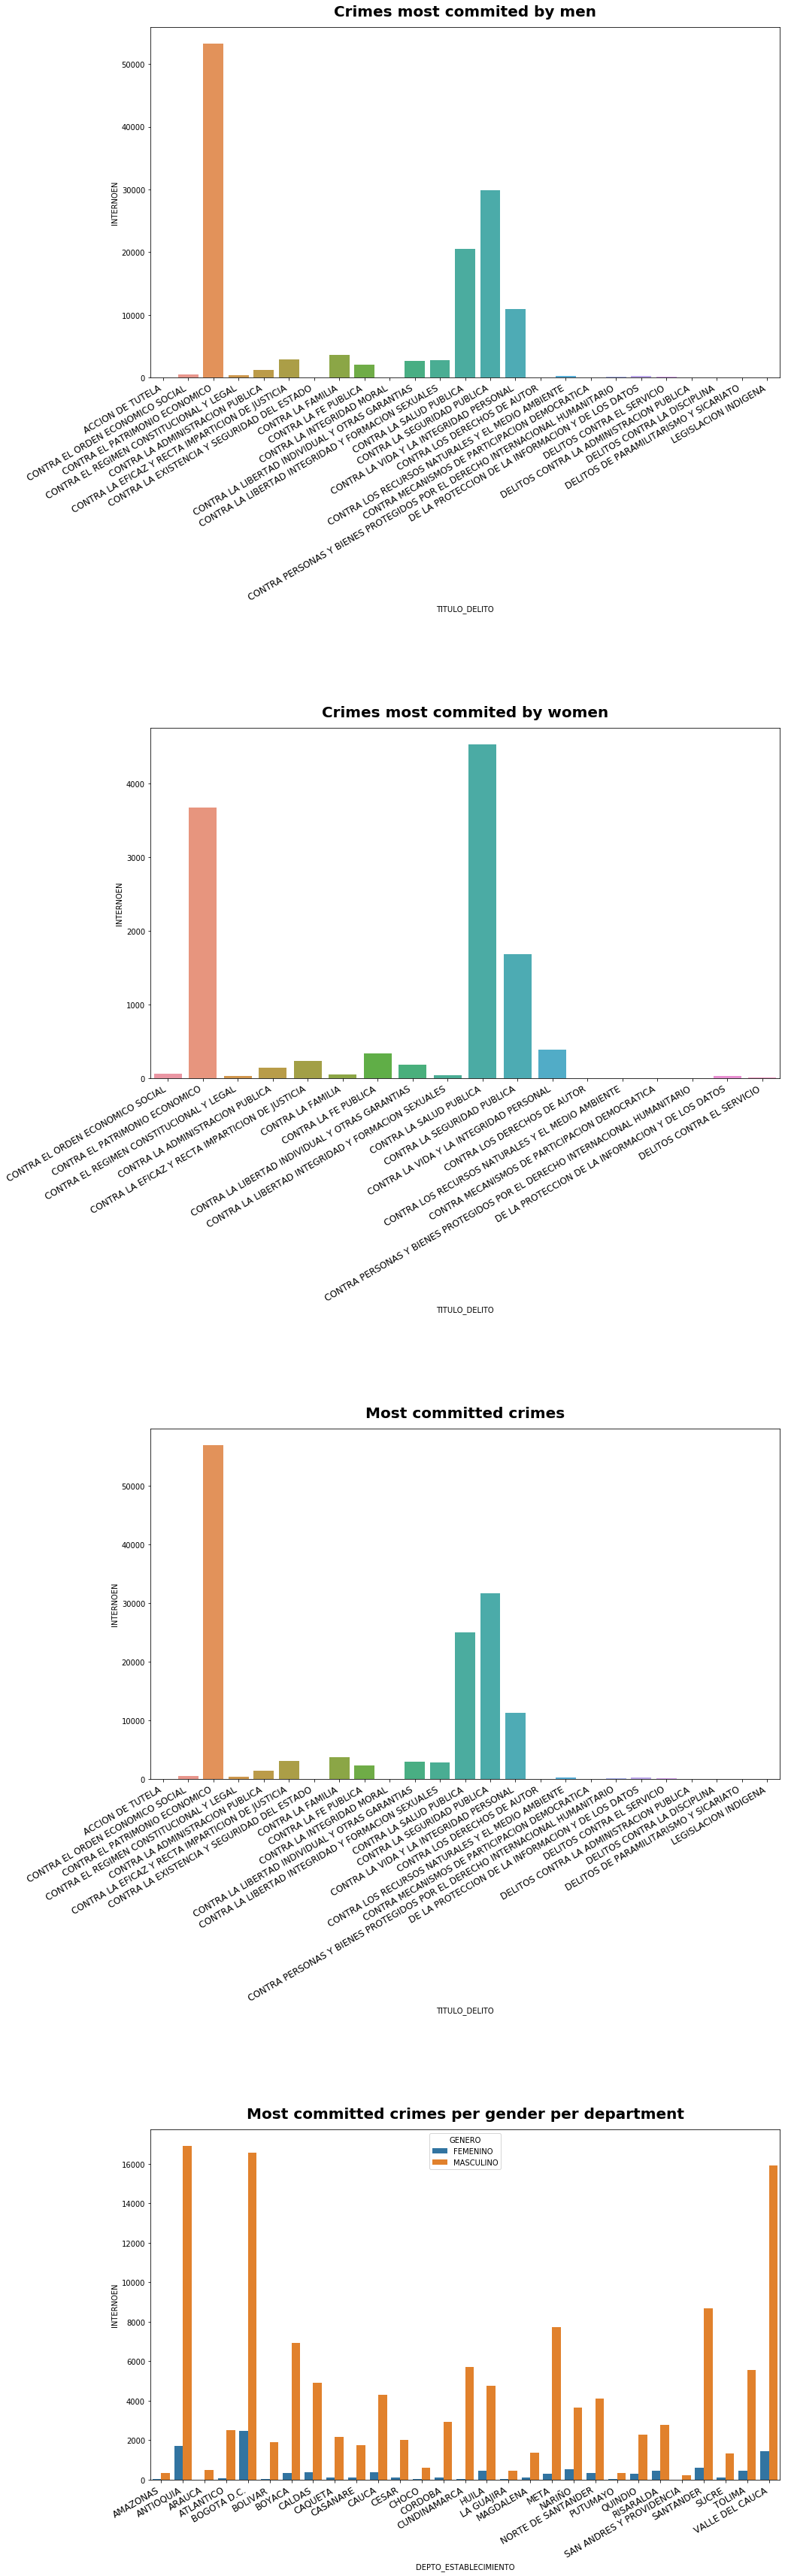

In [184]:
# g = sns.FacetGrid(df_genero, col="GENERO")
# g.map(plt.hist, "TITULO_DELITO");

fig_dims = (15, 60)
fig, ax = plt.subplots(4,figsize=fig_dims)

sns.barplot(x="TITULO_DELITO", y="INTERNOEN", data=df_genero[df_genero["GENERO"]=="MASCULINO"], ax=ax[0])
sns.barplot(x="TITULO_DELITO", y="INTERNOEN", data=df_genero[df_genero["GENERO"]=="FEMENINO"], ax=ax[1])
sns.barplot(x="TITULO_DELITO", y="INTERNOEN", data=df_crimen, ax=ax[2])
sns.barplot(x="DEPTO_ESTABLECIMIENTO", y="INTERNOEN", hue="GENERO", data=df_geo_gen, ax=ax[3])

ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=30, horizontalalignment='right', fontsize = 12)
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=30, horizontalalignment='right', fontsize = 12)
ax[2].set_xticklabels(ax[2].get_xticklabels(),rotation=30, horizontalalignment='right', fontsize = 12)
ax[3].set_xticklabels(ax[3].get_xticklabels(),rotation=30, horizontalalignment='right', fontsize = 12)

ax[0].set_title('Crimes most commited by men', fontsize=20, fontweight='bold', pad=15)
ax[1].set_title('Crimes most commited by women', fontsize=20, fontweight='bold', pad=15)
ax[2].set_title('Most committed crimes', fontsize=20, fontweight='bold', pad=15)
ax[3].set_title('Most committed crimes per gender per department', fontsize=20, fontweight='bold', pad=15)

fig.subplots_adjust(wspace=.1, hspace=1);


# plt.set_xticklabels(rotation=45, horizontalalignment='right')
# plt.ylabel("COUNT")
# plt.title("Colors vs Values") # You can comment this line out if you don't need title
# plt.show(fig)

# sns.barplot(x = 'TITULO_DELITO', y = 'INTERNOEN', hue = 'GENERO', data = df_genero,
#             palette = 'hls',
#             order = ['MASCULINO', 'FEMENINO'],  
#             capsize = 0.05,             
#             saturation = 8,             
#             errcolor = 'gray', errwidth = 2,  
#             ci = 'sd'   
#             )

In [160]:
df_mj[df_mj["TITULO_DELITO"]=="CONTRA EL PATRIMONIO ECONOMICO"]["DELITO"].unique()

array(['HURTO', 'EXTORSION', 'ESTAFA', 'ABUSO DE CONFIANZA',
       'DAÑO EN BIEN AJENO', 'EMISION Y TRANSFERENCIA ILEGAL DE CHEQUE',
       'ABUSO DE CONDICIONES DE INFERIORIDAD',
       'ALTERACION DESFIGURACION Y SUPLANTACION DE MARCAS DE GANADO',
       'DEFRAUDACION DE FLUIDOS',
       'UTILIZACION INDEBIDA DE INFORMACION PRIVILEGIADA', 'ABIGEATO',
       'INVASION DE TIERRAS O EDIFICACIONES', 'ALZAMIENTO DE BIENES',
       'GESTION INDEBIDA DE RECURSOS SOCIALES',
       'SUSTRACCION DE BIEN PROPIO',
       'PERTURBACION DE LA POSESION SOBRE INMUEBLE'], dtype=object)